# Avocado Project

### Data Description

- The Avocado dataset includes consumption of fruit in different regions of USA. 

### Objective

- The avocado dataset we are classifying based on region type and predicting the average price using Regression model. The data has 16 quantitative input variables, and 1 quantitative output variable, and 30 instances (observations). 

### Importing the Libraries

In [1]:
# Numerical libraries
import numpy as np  
import pandas as pd  # to handle data in form of rows and columns   
import matplotlib.pyplot as plt   # importing ploting libraries
import matplotlib.style
from matplotlib import pyplot
%matplotlib inline   
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns  #importing seaborn for statistical plots
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

from sklearn.preprocessing import StandardScaler   # Import StandardScaler library
from sklearn.model_selection import train_test_split    # Import TrainTest Split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor  # Import KNN Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor   # Import Decision Tree Regressor machine learning library
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  #Import the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy import stats   # Import stats from scipy
from sklearn.model_selection import cross_val_score   #importing the cross validation score

### Importing the Dataset

In [2]:
# reading the CSV file into pandas dataframe
df=pd.read_csv(r'C:\Users\Dell\Documents\avocado.csv') 

In [3]:
# Read first 5 observations of the dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


- The column "Unnamed:0" is just a representation of the indexes with some numbers. It doesn't affect the datset. So it's useless to keep it, lets remove it !

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.shape

(18249, 13)

In [7]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

### Exploratory Data Analysis

In [8]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

- Here, for one case, the target variable 'Average Price' is float. Hence it is a regression model
- For other case, the target variable 'region' is object. Hence it is a classification model

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


###### Checking for duplicates

In [10]:
duplicate=df[df.duplicated()]
print('Duplicate Rows:')
duplicate

Duplicate Rows:


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


- There are no duplicate rows in the dataset.

###### Checking for null values

In [11]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- There is no null data in the dataset

In [12]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- The average price of Avocado is 1.40, minimum is 0.44 and maximum is 3.25. 

##### Analysis of the body of distributions

- Let's analyze the average price

<AxesSubplot:xlabel='AveragePrice'>

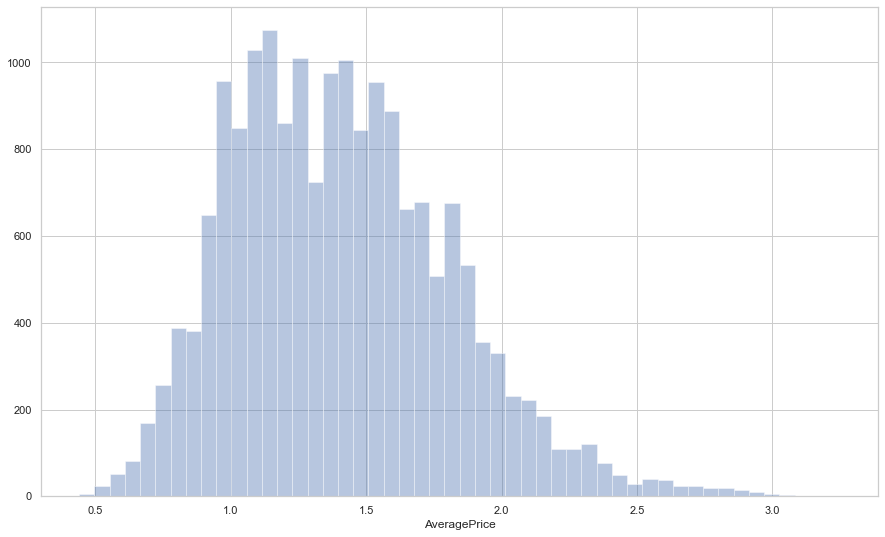

In [13]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False)

- The average price of Avocados lies in the range of 1.1 to 1.5

Text(0.5, 1.0, 'Average Price')

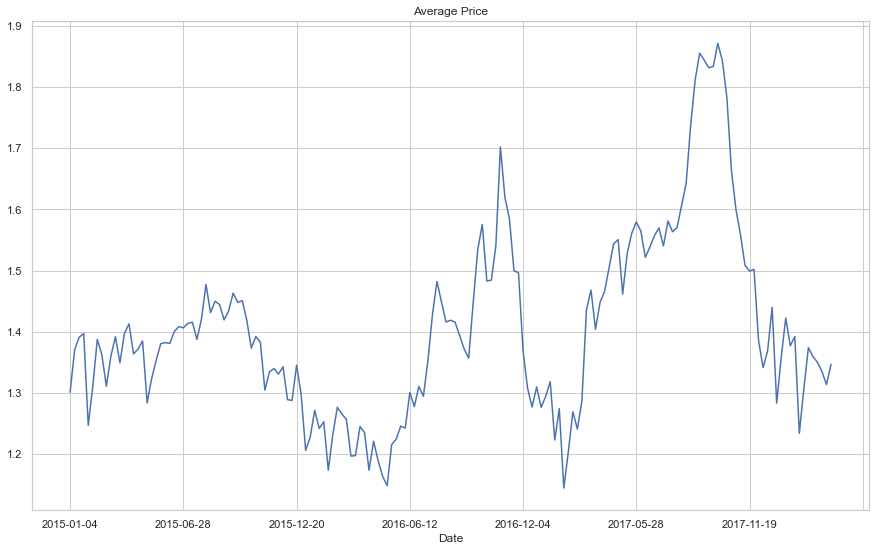

In [14]:
fig, ax = plt.subplots(figsize=(15, 9))
date=df.groupby('Date').mean()
date['AveragePrice'].plot()
plt.title('Average Price')

- From the above graph, we observe that the average prices of Avocados gradually increased year by year. The average prices were higher in the year '2017'

Text(0.5, 1.0, 'Distribution of Average prices of Avocados')

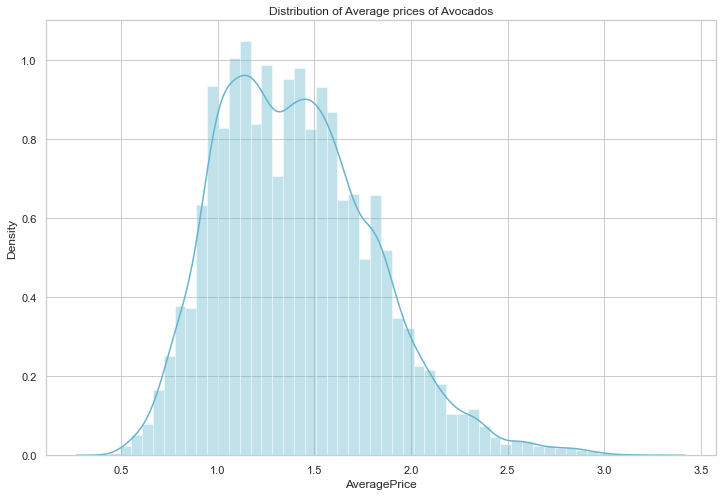

In [15]:
#Visualizing how the average prices are distributed.

f,ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.distplot(df['AveragePrice'], kde = True, color = 'c')
plt.title('Distribution of Average prices of Avocados')

- 'Average Price' has a fairly smooth ascension from min to max and the distribution is almost normal

In [16]:
#finding how much average price is skewed

avgprice_log=np.log(df['AveragePrice']) 
avgprice_log.skew() 

-0.18432079129564852

- The skewness is very low i.e., -0.18, it indicates that the distribution is fairly symmetrical as its lying between -0.5 and 0.5


conventional    9126
organic         9123
Name: type, dtype: int64


Text(0.5, 1.0, 'type')

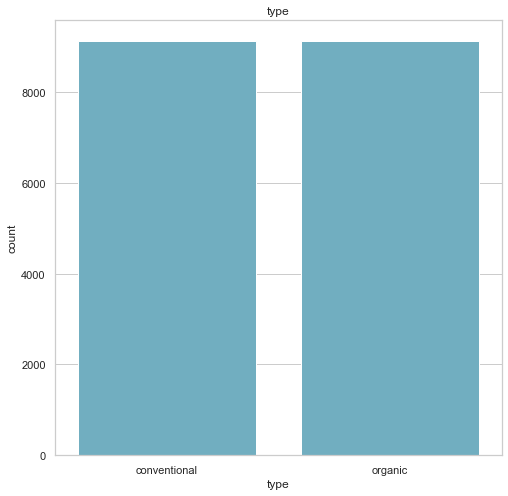

In [17]:
print(df['type'].value_counts())
f,ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.countplot(df['type'], color = 'c')  #Using countplot since its a categorical column
plt.title('type')

- We find that the conventional type of Avocados are three more than the organic type of avocados

DallasFtWorth          338
Philadelphia           338
Detroit                338
Southeast              338
Syracuse               338
Midsouth               338
Roanoke                338
Boise                  338
Northeast              338
Charlotte              338
NorthernNewEngland     338
LosAngeles             338
SanFrancisco           338
BuffaloRochester       338
Indianapolis           338
PhoenixTucson          338
Seattle                338
RaleighGreensboro      338
CincinnatiDayton       338
California             338
SanDiego               338
Boston                 338
NewOrleansMobile       338
RichmondNorfolk        338
Columbus               338
Pittsburgh             338
Portland               338
Sacramento             338
LasVegas               338
GrandRapids            338
Albany                 338
TotalUS                338
Jacksonville           338
StLouis                338
Nashville              338
Houston                338
Louisville             338
N

Text(0.5, 1.0, 'region')

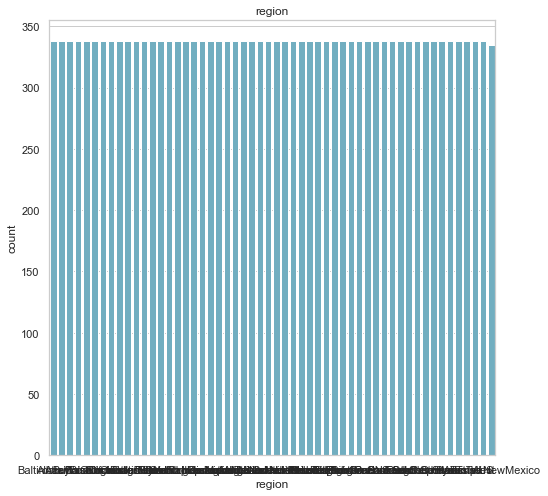

In [18]:
print(df['region'].value_counts())
f,ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.countplot(df['region'], color = 'c')  #Using countplot since its a categorical column
plt.title('region')

- We find there are 54 regions of USA in which avocados are sold. 

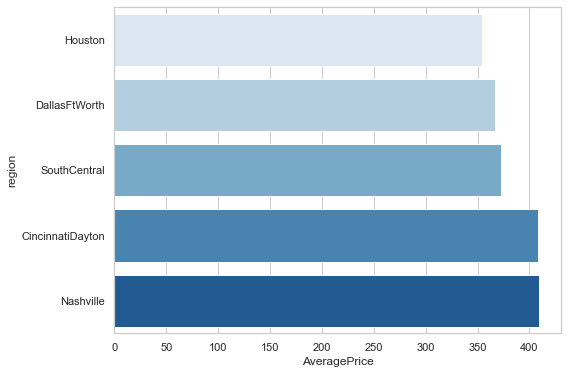

In [19]:
avgprice = df['AveragePrice'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax = sns.barplot(avgprice.head(), avgprice.head().index, palette='Blues')

- The above are the first 5 regionSouthCentrals when sorted based on average prices of avocados in ascending order i.e., Houston, DaliasFtWorth, SouthCentral are the first 3 regions with lowest average price

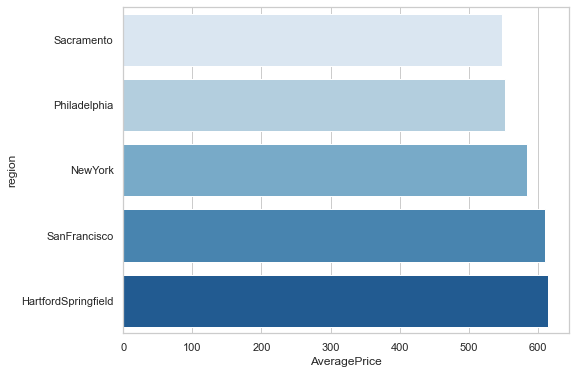

In [20]:
avgprice = df['AveragePrice'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax = sns.barplot(avgprice.tail(), avgprice.tail().index, palette='Blues')

- The above are the last 5 regions when sorted based on average prices of avocados in ascending order i.e., NewYork, SanFrancisco, HartfordSpringfiled are the top 3 regions with highest average price

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

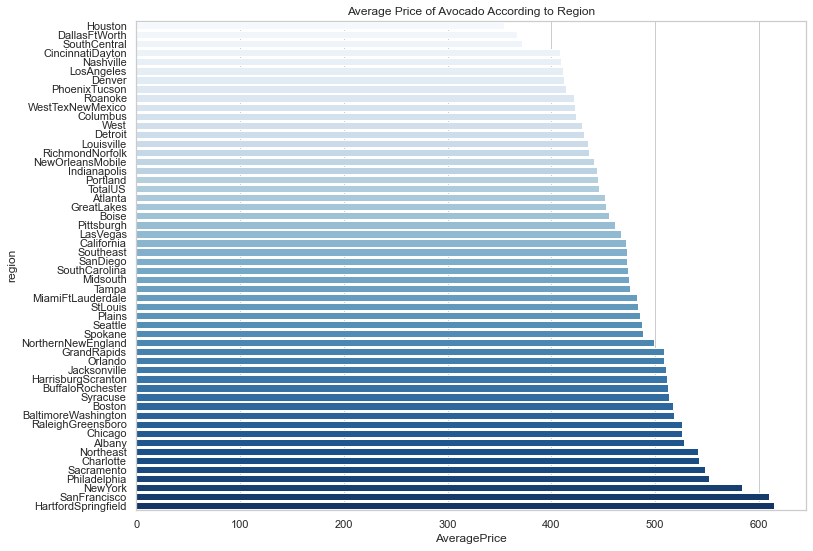

In [21]:
#Lets visualize the average prices of avocados by region
avgprice = df['AveragePrice'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(12,9))
ax = sns.barplot(avgprice, avgprice.index, palette='Blues')
plt.title('Average Price of Avocado According to Region')


- We find that average prices of Avocados are lowest in Houston and highest in HartfordSpringfield.

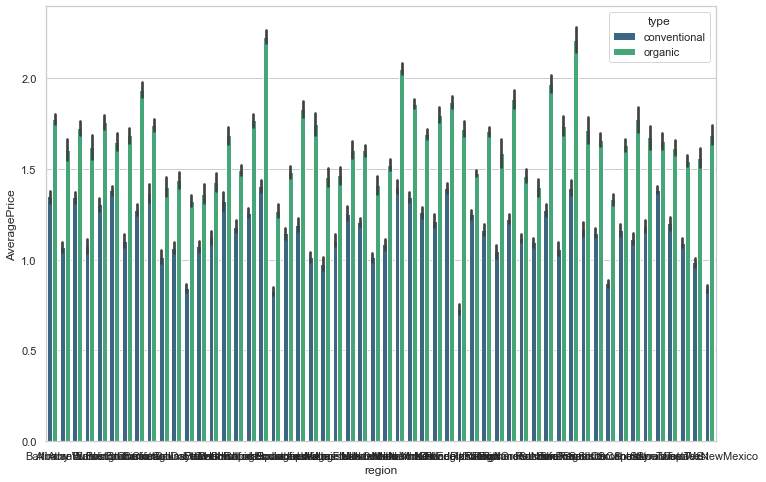

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='AveragePrice',hue='type', data=df, palette='viridis')

- The average prices of Avocados are higher for the 'organic' type of avocados

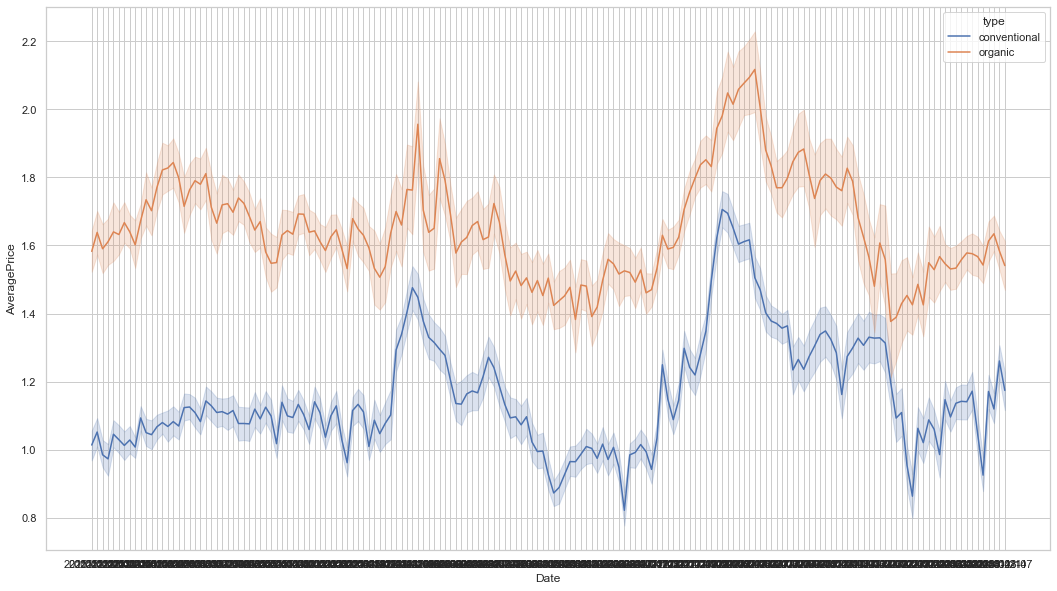

In [23]:
#Let's check how average prices are distributed over years for both conventional and organic type

plt.figure(figsize=(18,10))
sns.lineplot(x="Date", y="AveragePrice", hue='type', data=df)
#plt.xticks(rotation=90)
plt.show()

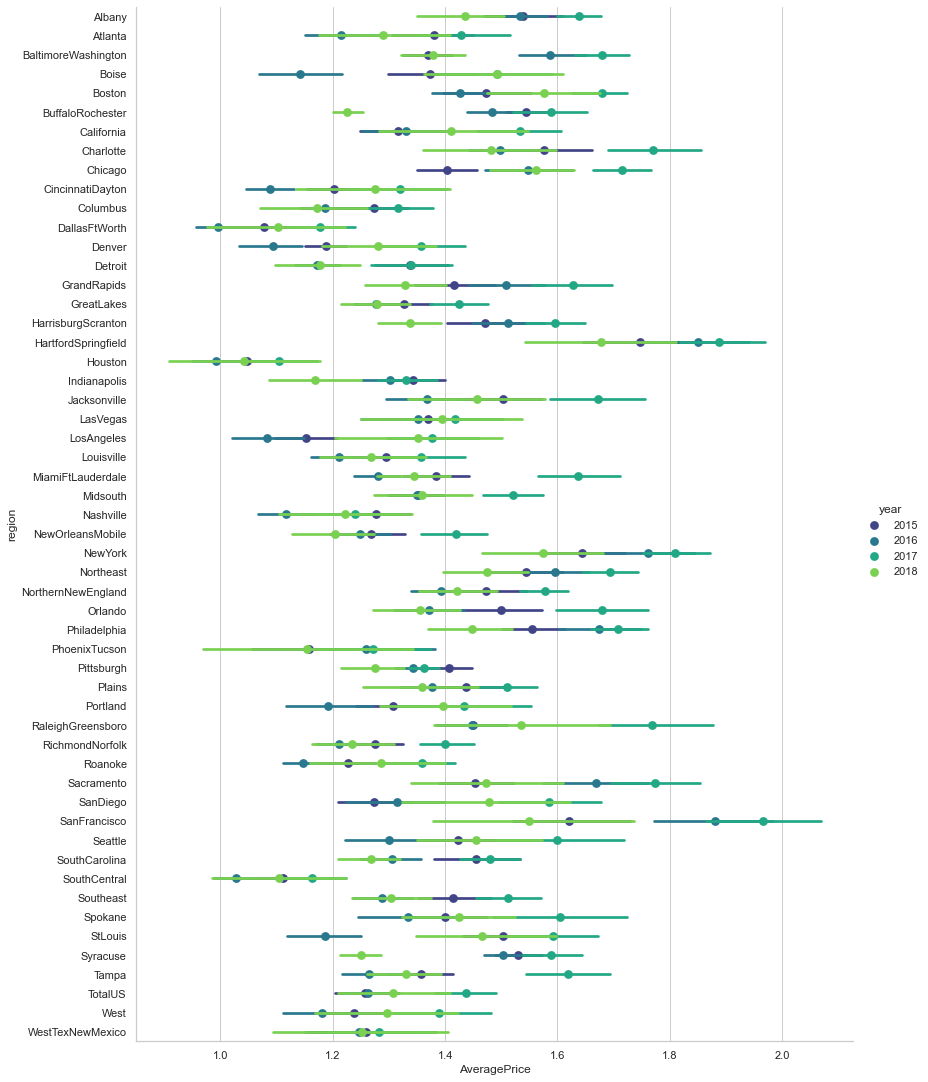

In [24]:
sns.factorplot('AveragePrice','region',data=df,hue='year',
                   aspect=0.8,height=15,palette='viridis',join=False)

- A factor plot is simply the same plot generated for different response and factor variables and arranged on a single page.
- The above plot is a factor plot of average avocado prices for different regions classified by year


(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

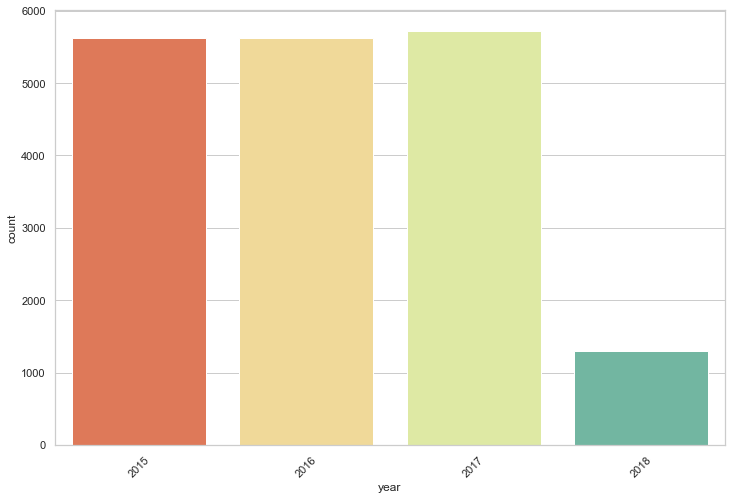

In [25]:
# Bar Chart to indicate the year

plt.figure(figsize=[12,8])
sns.countplot(x = 'year', data = df,palette='Spectral')
plt.xticks(rotation = 45)

In [26]:
#checking the mean of price at each year of Avocados
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [27]:
#finding how much type of Avocados were sold in last 4 years
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

- We find that almost equal number of Avocados were sold of each type. 

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

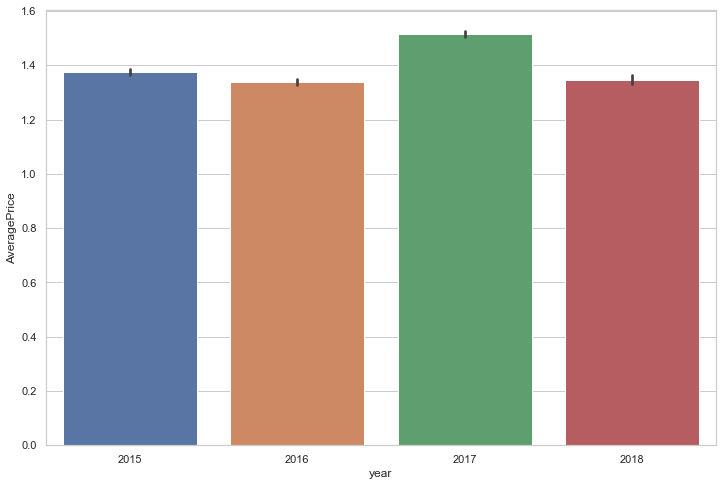

In [28]:
#Checking which year has maximum average price

plt.figure(figsize=[12,8])
sns.barplot(x='year',y='AveragePrice',data=df)

- We find that the average price of avocados are higher in the year '2017',next is '2015' and least in the year '2016'

Text(0.5, 1.0, 'Total Volume According to Region')

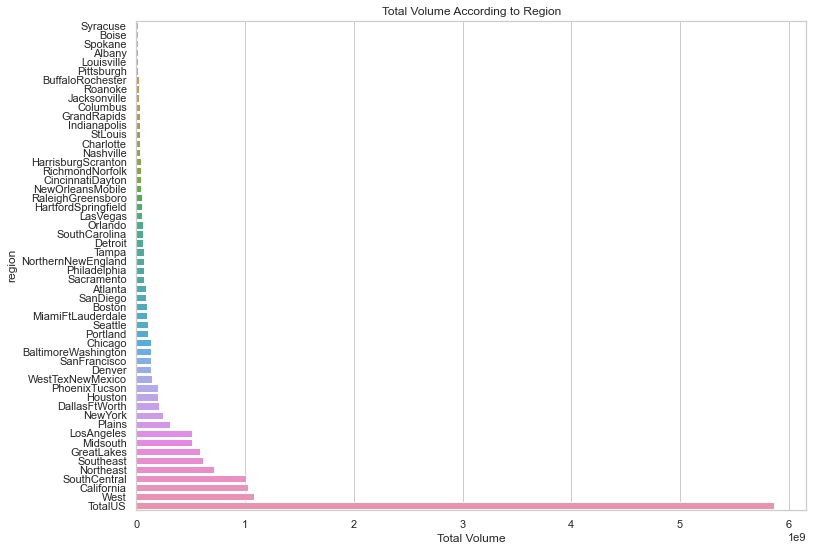

In [29]:
#Lets visualize the total volume of avocados by region

totvol = df['Total Volume'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(12,9))
ax = sns.barplot(totvol, totvol.index)
plt.title('Total Volume According to Region')


- Looks like these are the regions where Consumption(total volume-number of avocados) is very high
  - West
  - California
  - South Central
  - Northeast
  - Southeast

<AxesSubplot:>

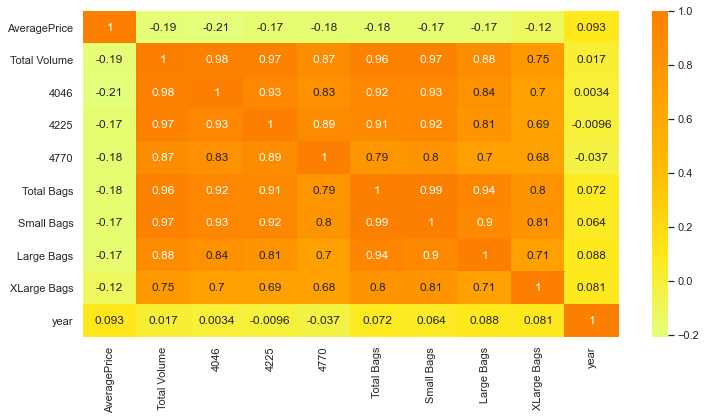

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='Wistia',annot=True)

- From the above heatmap,we find that all features are not correlated with Average Price. Instead, we find that the features are highly correlated with each other

In [31]:
df1=df.copy()
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- There are three categorical columns in the dataset. They are Date, type and region.
- We can convert the categorical data to numerical data by the following techniques
   - Find and replace
   - Label encoding
   - One hot encoding
   - Custom Binary encoding
- Here we use 'Label encoding' for simply converting each value in a column to a number.

In [32]:
#Converting 'region' to numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0


In [33]:
df['region'].value_counts()

47    338
31    338
6     338
37    338
21    338
5     338
52    338
36    338
20    338
4     338
51    338
35    338
19    338
3     338
50    338
34    338
18    338
2     338
49    338
33    338
17    338
1     338
48    338
32    338
16    338
22    338
38    338
7     338
27    338
15    338
46    338
30    338
14    338
45    338
29    338
13    338
44    338
28    338
12    338
43    338
11    338
23    338
42    338
26    338
10    338
41    338
25    338
9     338
40    338
24    338
8     338
39    338
0     338
53    335
Name: region, dtype: int64

- We find that all the region names are converted to numeric values fom 0 to 53

In [34]:
#Converting 'type' to numerical data

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [35]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

- We find that the type are converted to numeric values as 0 to 1

In [36]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

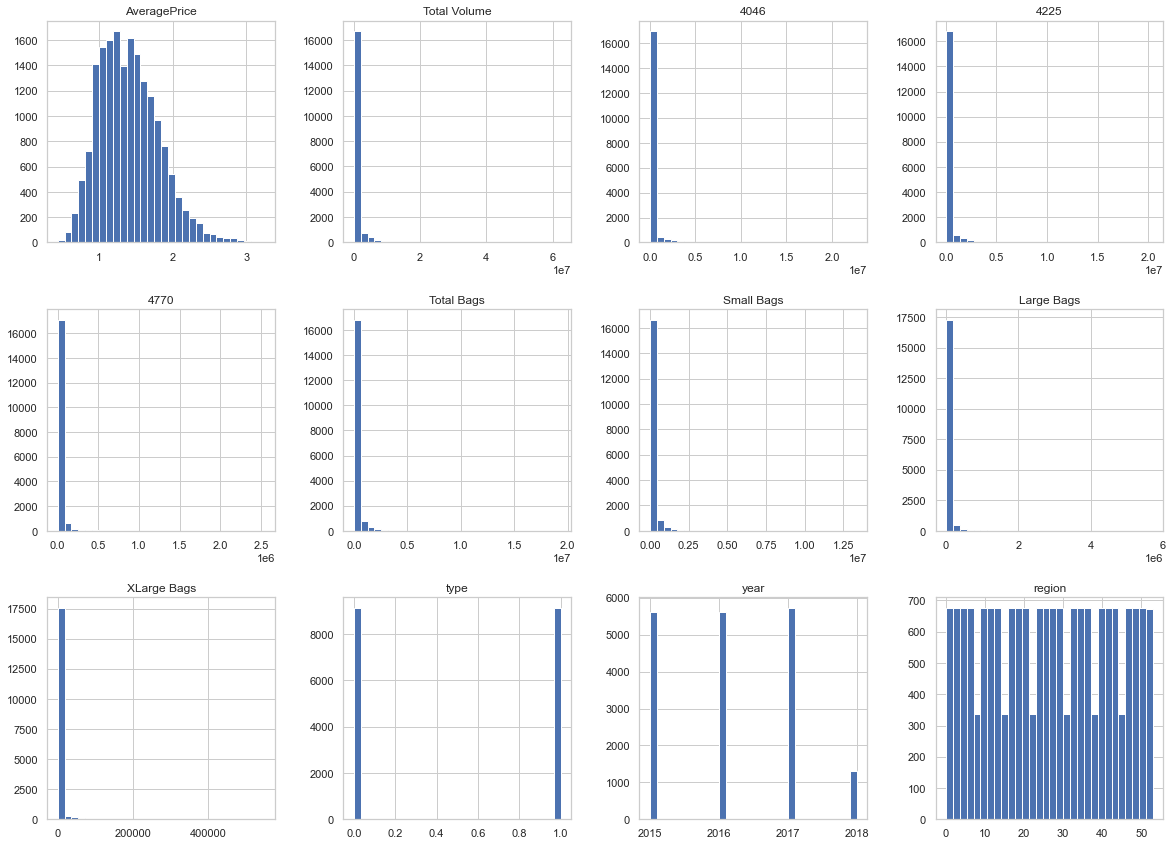

In [37]:
#Plotting  histogram to check how data is distributed
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

- Average price column is normally distributing over the histogram.
- All the remaining columns data are almost left skewed data
- We can remove the skewness and make the columns as normally distributed.

In [38]:
#Checking the skewness of each column

df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

- Methods for handling skewed data
   - Log transform
   - Square Root transform
   - Box-cox transform

- Here, using Log transform for transforming the data. 

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

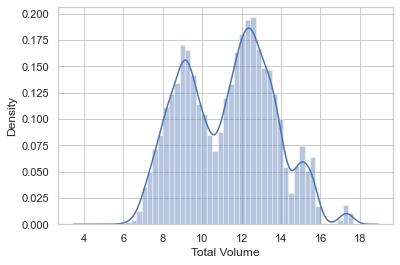

In [39]:
log_vol=np.log(df['Total Volume'])
sns.distplot(log_vol)



- 'Total Volume' has fairly ascension from min to max and the distribution looks like normal

- Applying square root transform on the other columns

<AxesSubplot:xlabel='4046', ylabel='Density'>

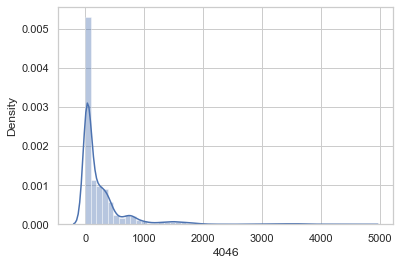

In [40]:
col1=np.sqrt(df['4046'])
sns.distplot(col1)

<AxesSubplot:xlabel='4225', ylabel='Density'>

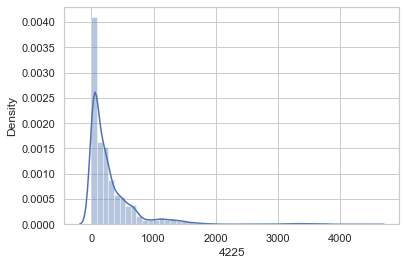

In [41]:
col1=np.sqrt(df['4225'])
sns.distplot(col1)

<AxesSubplot:xlabel='4770', ylabel='Density'>

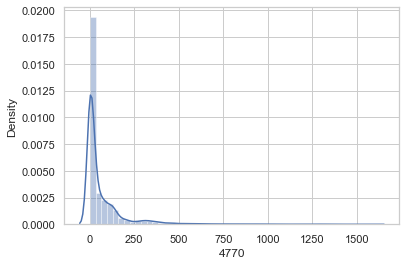

In [42]:
col1=np.sqrt(df['4770'])
sns.distplot(col1)

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

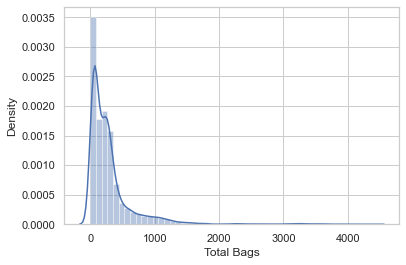

In [43]:
col1=np.sqrt(df['Total Bags'])
sns.distplot(col1)

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

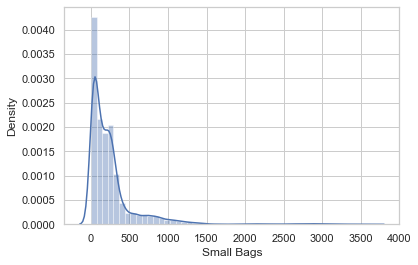

In [44]:
col1=np.sqrt(df['Small Bags'])
sns.distplot(col1)

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

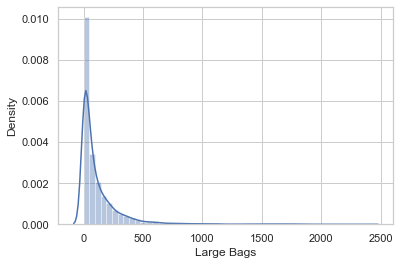

In [45]:
col1=np.sqrt(df['Large Bags'])
sns.distplot(col1)

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

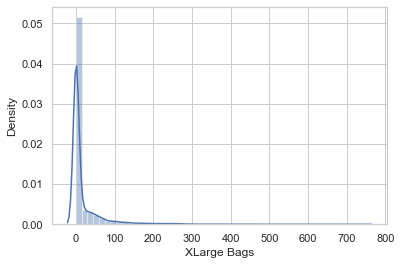

In [46]:
col1=np.sqrt(df['XLarge Bags'])
sns.distplot(col1)

##### Checking for outliers
- An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the data set.

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
type            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
year            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
region          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

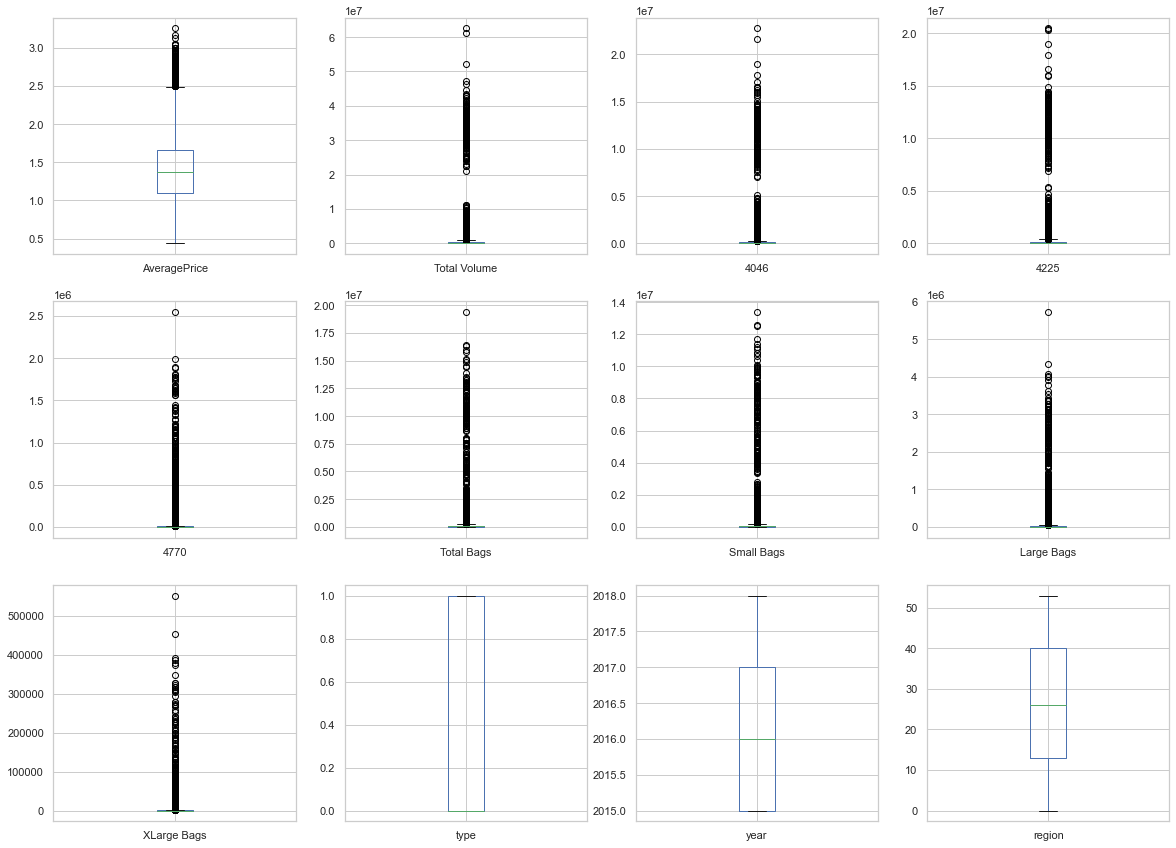

In [47]:
# Boxplots of all the columns

df.plot(kind='box',subplots=True,figsize=(20,20),layout=(4,4))

- There are several methods to remove outliers. We are using IQR method to treat the outliers

In [48]:
#Creating a function to drop the outliers in the bmi column
def drop_outliers(df,col_name):
    iqr=1.5+(np.percentile(df[col_name],75)-np.percentile(df[col_name],25))
    df.drop(df[df[col_name]>(iqr+np.percentile(df[col_name],75))].index,inplace=True)
    df.drop(df[df[col_name]<(np.percentile(df[col_name],25)-iqr)].index,inplace=True)

In [49]:
drop_outliers(df,'Total Volume')

In [50]:
drop_outliers(df,'4046')

In [51]:
drop_outliers(df,'4225')

In [52]:
drop_outliers(df,'4770')

In [53]:
drop_outliers(df,'Total Bags')

In [54]:
drop_outliers(df,'Small Bags')

In [55]:
drop_outliers(df,'Large Bags')

In [56]:
drop_outliers(df,'XLarge Bags')

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
type            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
year            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
region          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

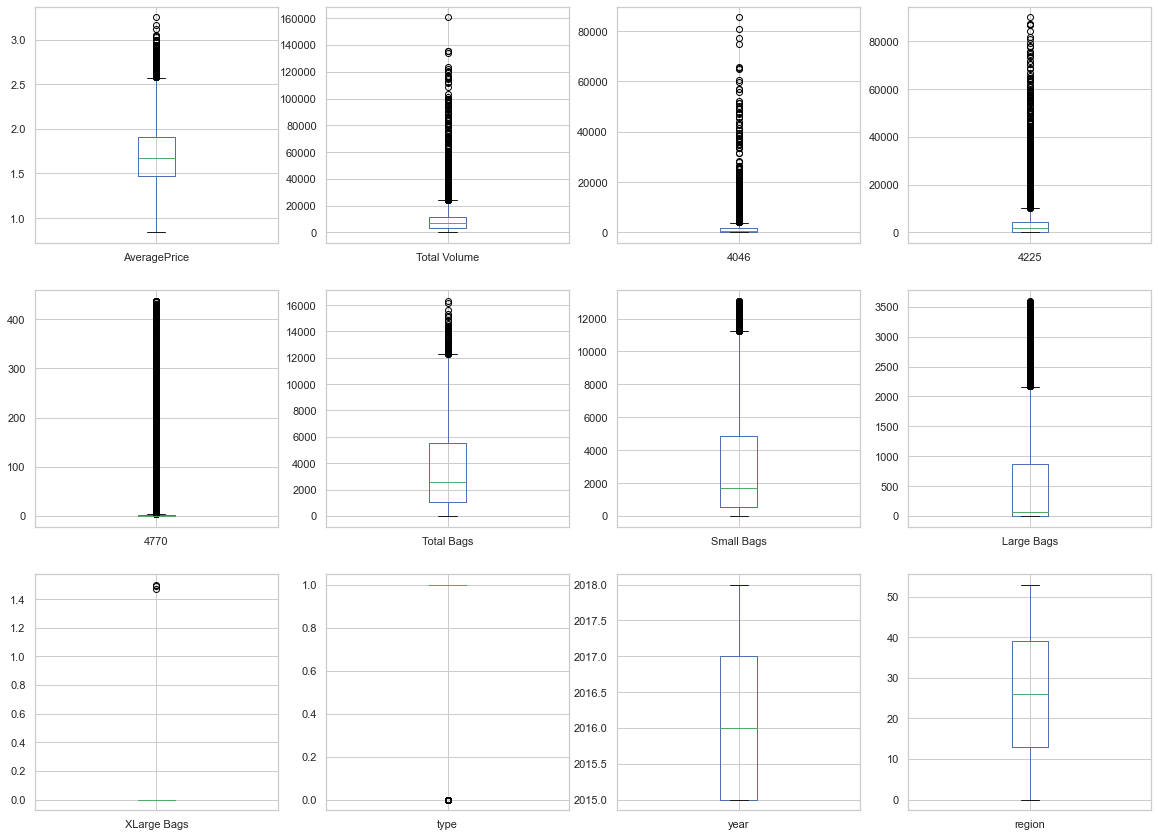

In [57]:
# Boxplots of all the columns

df.plot(kind='box',subplots=True,figsize=(20,20),layout=(4,4))

In [58]:
df.shape

(5726, 13)

- After removing the outliers, we find that data has been reduced to 5726 rows from 18249 rows.

<AxesSubplot:>

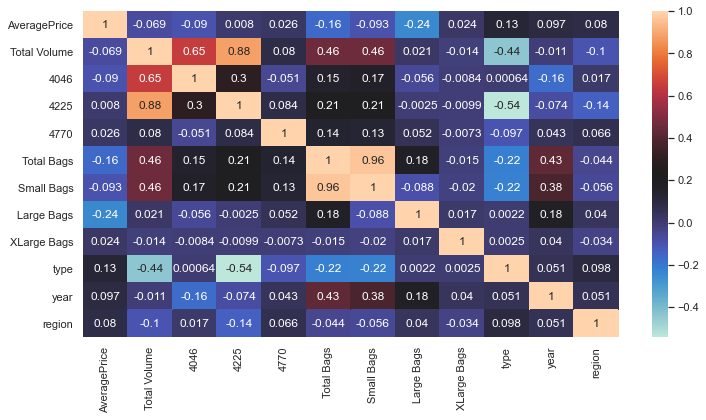

In [59]:
#Correlation map after converting categorical data to numerical data

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='icefire',annot=True)

## Prediction with Average Price

- We are dropping the target variable 'Average Price' for building the models and 'Date' column as it has nothing to do with models building.

In [60]:
x = df.drop(['AveragePrice','Date'], axis=1)
y = df['AveragePrice']


- Here we are using the standard scalar method on x 

In [61]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

#### Splitting the data into train and test

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler,y, random_state=80,test_size=0.25)

#### Building the models

In [63]:
#Defining a function to check the scores of the models
def evaluate_model(model, x_train, x_test, y_train, y_test): 
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    #Calculating Details
    model_train_acc = round(model.score(x_train, y_train) * 100, 2)
    model_test_acc= round(model.score(x_test, y_test) * 100, 2)
    print('Train Score is : ', model_train_acc)
    print('Test Score is : ' , model_test_acc)
    #Calculating Prediction
    print('R2 Score:',r2_score(y_test, y_pred))
    print('MSE:',mean_squared_error(y_test, y_pred))
    print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))
    

In [64]:
print("==========LINEAR REGRESSION===========")
evaluate_model(LinearRegression(),x_train, x_test, y_train, y_test)

==========LINEAR REGRESSION===========
Train Score is :  15.83
Test Score is :  13.48
R2 Score: 0.13479681351616846
MSE: 0.09107452614934573
RMSE:  0.3017855631890726


In [65]:
print("==========ADA BOOST REGRESSOR===========")
evaluate_model(AdaBoostRegressor(),x_train, x_test, y_train, y_test)

==========ADA BOOST REGRESSOR===========
Train Score is :  28.42
Test Score is :  24.21
R2 Score: 0.24206813724261356
MSE: 0.0797827450620582
RMSE:  0.2824583952762923


In [66]:
print("==========GRADIENT BOOST REGRESSOR===========")
evaluate_model(GradientBoostingRegressor(),x_train, x_test, y_train, y_test)

==========GRADIENT BOOST REGRESSOR===========
Train Score is :  59.23
Test Score is :  53.59
R2 Score: 0.5359327821255475
MSE: 0.048849452509674464
RMSE:  0.22101912249774783


In [67]:
print("==========K NEIGHBORS REGRESSOR===========")
evaluate_model(KNeighborsRegressor(),x_train, x_test, y_train, y_test)

==========K NEIGHBORS REGRESSOR===========
Train Score is :  74.3
Test Score is :  58.52
R2 Score: 0.5852394715466487
MSE: 0.04365924581005587
RMSE:  0.20894795000204205


In [68]:
print("==========DECISION TREE REGRESSOR===========")
evaluate_model(DecisionTreeRegressor(),x_train, x_test, y_train, y_test)

==========DECISION TREE REGRESSOR===========
Train Score is :  100.0
Test Score is :  29.5
R2 Score: 0.29504023357043707
MSE: 0.07420670391061453
RMSE:  0.272409074574645


In [69]:
print("==========RANDOM FOREST REGRESSOR===========")
evaluate_model(RandomForestRegressor(),x_train, x_test, y_train, y_test)

==========RANDOM FOREST REGRESSOR===========
Train Score is :  95.55
Test Score is :  69.22
R2 Score: 0.69216698941883
MSE: 0.03240365501396649
RMSE:  0.1800101525302573


- For random state 80, we find that test score i.e., accuracy is highest for 'Random Forest regressor' model when compared to other models.


##### - Now, we define a loop to find for which random state and for which model accuracy is highest.

In [70]:
model=[LinearRegression(),AdaBoostRegressor(),GradientBoostingRegressor(),
      KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
max_r2_score=0
n=10 #for 10 random states of range 40 to 90
r=[]
import random
for j in range(n):
    r.append(random.randint(40,90))
    
for random_state in r:
    x_train, x_test, y_train, y_test = train_test_split(x_scaler,y, random_state=random_state,test_size=0.25)
    for i in model:
        i.fit(x_train,y_train)
        pred=i.predict(x_test)
        R2_score=r2_score(y_test,pred)
        print('R2 score for randomstate',random_state,'for model',i,'is',R2_score)
        if R2_score>max_r2_score:
            max_r2_score=R2_score
            final_random_state=random_state
            final_model=i
print()
print('#'*100)
print('Max R2 score corresponding to randomstate',final_random_state,'is',max_r2_score,'and model is',final_model)

R2 score for randomstate 65 for model LinearRegression() is 0.1726587895927998
R2 score for randomstate 65 for model AdaBoostRegressor() is 0.2789981032224145
R2 score for randomstate 65 for model GradientBoostingRegressor() is 0.5361637991152861
R2 score for randomstate 65 for model KNeighborsRegressor() is 0.5714671222581468
R2 score for randomstate 65 for model DecisionTreeRegressor() is 0.4102405469261927
R2 score for randomstate 65 for model RandomForestRegressor() is 0.6771008568477164
R2 score for randomstate 47 for model LinearRegression() is 0.10265674545142878
R2 score for randomstate 47 for model AdaBoostRegressor() is 0.1869237926555607
R2 score for randomstate 47 for model GradientBoostingRegressor() is 0.5122424058222872
R2 score for randomstate 47 for model KNeighborsRegressor() is 0.582629284692995
R2 score for randomstate 47 for model DecisionTreeRegressor() is 0.30768697072847195
R2 score for randomstate 47 for model RandomForestRegressor() is 0.6488455963763708
R2 sc

- We got maximum R2 score for RandomForestRegressor for the random state 78 i.e., 70.07 

##### Hyperparameter tuning


- Let's perform hyperparameter tuning for finding the best parameters for Random Forest algorithm using GridSearchCv

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler,y, random_state=84,test_size=0.25)
rf=RandomForestRegressor()
parameters={'n_estimators':[100,200,300,1000],
           'max_features':['auto','sqrt'],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4]}
rf_random=GridSearchCV(estimator=rf,param_grid=parameters,cv=3,n_jobs=-1)
rf_random.fit(x_train,y_train)
rf_random.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [72]:
rfr=RandomForestRegressor(max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=1000)
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [73]:
print('R2 Score:',r2_score(y_test, pred))
print('MSE:',mean_squared_error(y_test, pred))
print("RMSE: ",mean_squared_error(y_test, pred, squared=False))
    
#print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
#print('Mean Squared Error:',mean_squared_error(y_test,pred))
#print("RMSE:",mean_squared_error(y_test, pred, squared=False))

R2 Score: 0.7170546741594475
MSE: 0.03495831621948318
RMSE:  0.18697143155969892


Text(0, 0.5, 'predicted_y')

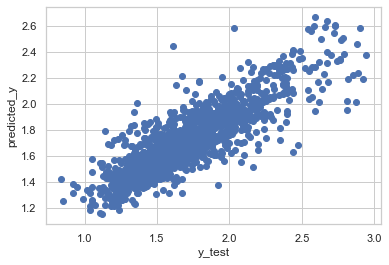

In [74]:
#atual and predicted scatter plot

plt.scatter(x=y_test,y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted_y')

### Saving the model - Prediction with Average Price

In [75]:
import pickle
filename = 'avocadoavgprice.pkl'
pickle.dump(rfr, open(filename, 'wb'))

In [76]:
model=pickle.load(open('avocadoavgprice.pkl','rb'))
result=model.score(x_test,y_test)
print(result*100)

71.70546741594475


In [77]:
conclusion=pd.DataFrame([model.predict(x_test)[:],pred[:]],index=['Predicted','Original'])

In [78]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431
Predicted,1.56403,1.63537,1.92874,1.22228,1.81934,1.33306,1.37517,2.07328,1.45061,2.10097,...,1.89404,1.43977,1.65325,1.65839,1.47467,1.91142,1.26958,1.6359,1.33831,1.88175
Original,1.56403,1.63537,1.92874,1.22228,1.81934,1.33306,1.37517,2.07328,1.45061,2.10097,...,1.89404,1.43977,1.65325,1.65839,1.47467,1.91142,1.26958,1.6359,1.33831,1.88175


- We have build the model and predicted by taking average price as output variable which is continuity in nature. So, using the regression technique
- When calculating the best randomstate, 78 is the best random state which providing the highest R2 score for this model
- After finding the model with highest R2score, we are performing hyperparameter tuning.
- We used GridSearchCv to find the best params needed forthis model
- After using the best params, we got the best R2 score i.e., 0.705 and the model is Random Forest Regressor
- We also plot the scatter plot graph and we can notice tht actual and predicted values are very close to each other and hence the line is the best fit line.

## Prediction with region

- Here we need to predict based on region which is categorical in nature, so using the classification techniques.

In [79]:
#importing libraries for classification prediction

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve


In [80]:
#Converting 'type' to numerical data

le = LabelEncoder()
df1['type'] = le.fit_transform(df1['type'])
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


- We are dropping the target variable 'region' for building the models and 'Date' column as it has nothing to do with models building.

In [81]:
x_r=df1.drop(['region','Date'],axis=1)
y_r=df1['region']
print(x_r.shape)
print(y_r.shape)

(18249, 11)
(18249,)


In [82]:
#Standardizing the value of x so that mean will be 0 and std will become 1,and make the data normally distributed
sc=StandardScaler()
x_r_scaler=sc.fit_transform(x_r)

#### Splitting the data into train and test

In [83]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_r_scaler,y_r, random_state=80,test_size=0.25)

#### Building the models

In [84]:
#Defining a function to check the scores,confusion matrix and roc curve of the models

def evaluate_model(model, xr_train, xr_test, yr_train, yr_test): 
    model.fit(xr_train,yr_train)
    yr_pred = model.predict(xr_test)

    #Calculating Details
    model_train_acc = round(model.score(xr_train, yr_train) * 100, 2)
    model_test_acc= round(model.score(xr_test, yr_test) * 100, 2)
    print('Train Score is : ', model_train_acc)
    print('Test Score is : ' , model_test_acc)

    #Calculating Prediction
    accuracy= accuracy_score(yr_test , yr_pred )
    print('Accuracy Score is  = ', accuracy )
    f1_score= metrics.f1_score(yr_test, yr_pred,average='micro')
    print('F1 Score: ', f1_score)
    cm = confusion_matrix(yr_test , yr_pred )
    print('confusion matrix \n',  cm)
    sns.heatmap(cm, center = True)
    plt.show()

==========LOGISTIC REGRESSION===========
Train Score is :  34.97
Test Score is :  32.7
Accuracy Score is  =  0.3269778654394039
F1 Score:  0.3269778654394039
confusion matrix 
 [[28  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  1 36 ...  0  0  1]
 ...
 [ 0  0  0 ... 81  0  0]
 [ 0  0  0 ...  1 39  0]
 [ 0  1  0 ...  0  0 15]]


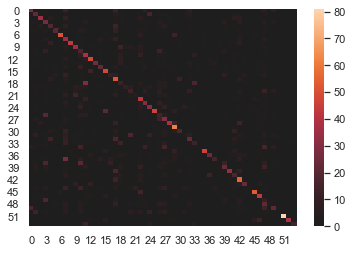

In [85]:
print("==========LOGISTIC REGRESSION===========")
evaluate_model(LogisticRegression(),xr_train, xr_test, yr_train, yr_test)

==========K NEIGHBOR CLASSIFIER===========
Train Score is :  66.51
Test Score is :  48.98
Accuracy Score is  =  0.4898093359631821
F1 Score:  0.4898093359631821
confusion matrix 
 [[38  0  0 ...  0  0  0]
 [ 2 42  0 ...  0  0  1]
 [ 1  2 53 ...  0  0  0]
 ...
 [ 0  0  0 ... 83  0  0]
 [ 0  0  0 ...  0 65  0]
 [ 2  4  3 ...  0  0 38]]


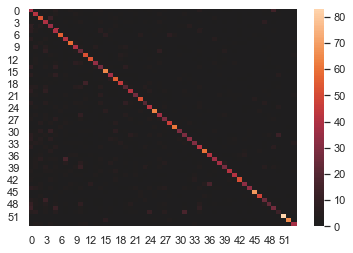

In [86]:
print("==========K NEIGHBOR CLASSIFIER===========")
evaluate_model(KNeighborsClassifier(),xr_train, xr_test, yr_train, yr_test)

==========DECISION TREE CLASSIFIER===========
Train Score is :  100.0
Test Score is :  79.53
Accuracy Score is  =  0.7953101030024107
F1 Score:  0.7953101030024107
confusion matrix 
 [[69  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  2]
 [ 0  0 80 ...  0  0  3]
 ...
 [ 0  0  0 ... 82  0  0]
 [ 0  0  0 ...  1 73  0]
 [ 0  1  0 ...  0  0 59]]


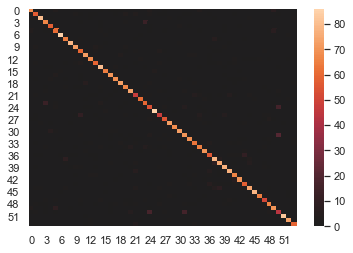

In [87]:
print("==========DECISION TREE CLASSIFIER===========")
evaluate_model(DecisionTreeClassifier(),xr_train, xr_test, yr_train, yr_test)

==========RANDOM FOREST CLASSIFIER===========
Train Score is :  100.0
Test Score is :  90.07
Accuracy Score is  =  0.9007232084155161
F1 Score:  0.9007232084155161
confusion matrix 
 [[85  0  0 ...  0  0  0]
 [ 0 75  0 ...  0  0  0]
 [ 0  0 89 ...  0  0  0]
 ...
 [ 0  0  0 ... 83  0  0]
 [ 0  0  0 ...  2 79  0]
 [ 0  1  0 ...  0  0 66]]


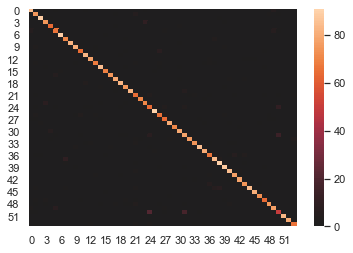

In [88]:
print("==========RANDOM FOREST CLASSIFIER===========")
evaluate_model(RandomForestClassifier(),xr_train, xr_test, yr_train, yr_test)

==========ADA BOOST CLASSIFIER===========
Train Score is :  7.04
Test Score is :  6.84
Accuracy Score is  =  0.06837606837606838
F1 Score:  0.06837606837606838
confusion matrix 
 [[ 0  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]]


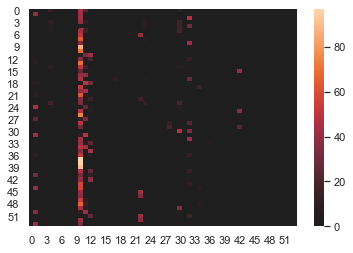

In [91]:
print("==========ADA BOOST CLASSIFIER===========")
evaluate_model(AdaBoostClassifier(),xr_train, xr_test, yr_train, yr_test)

==========SUPPORT VECTOR CLASSIFIER===========
Train Score is :  27.72
Test Score is :  25.05
Accuracy Score is  =  0.2504930966469428
F1 Score:  0.2504930966469428
confusion matrix 
 [[ 3  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  4]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  3  0 ...  0  0 33]]


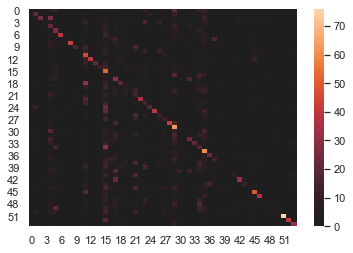

In [92]:
print("==========SUPPORT VECTOR CLASSIFIER===========")
evaluate_model(SVC(),xr_train, xr_test, yr_train, yr_test)

- From the models, we find that accuracy score is highest for 'Random Forest classifier' i.e.,90.07%

##### Hyperparameter Tuning

- We are performing hyper parameter tuning on Random Forest Classifier, to see if accuracy of the model increases

In [94]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_r_scaler,y_r, random_state=84,test_size=0.25)
rf_r=RandomForestClassifier()
parameters={'max_depth':[2,3,5,10,20],
           'min_samples_leaf':[5,10,20,50,100],
            'criterion':['gini','entropy']}
rf_r_random=GridSearchCV(estimator=rf_r,param_grid=parameters,cv=3,n_jobs=-1)
rf_r_random.fit(xr_train,yr_train)
rf_r_random.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [95]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=20,min_samples_leaf=5)
rfc.fit(xr_train,yr_train)
r_pred=rfc.predict(xr_test)

Train Score is :  96.7
Test Score is :  88.82
Accuracy Score is  =  0.8882314266929652
F1 Score:  0.8882314266929652
confusion matrix 
 [[73  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  1]
 [ 0  0 84 ...  0  0  0]
 ...
 [ 0  0  0 ... 84  0  0]
 [ 0  0  0 ...  0 87  0]
 [ 0  0  0 ...  0  0 51]]


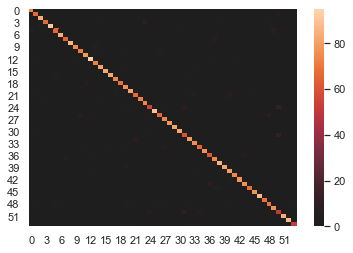

In [96]:
print('Train Score is : ',round(rfc.score(xr_train, yr_train) * 100, 2))
print('Test Score is : ' , round(rfc.score(xr_test, yr_test) * 100, 2))

    #Calculating Prediction
print('Accuracy Score is  = ', accuracy_score(yr_test , r_pred ))
print('F1 Score: ', metrics.f1_score(yr_test, r_pred,average='micro'))
print('confusion matrix \n',confusion_matrix(yr_test , r_pred ))
sns.heatmap(confusion_matrix(yr_test , r_pred ), center = True)
plt.show()

- After tuning, the accuracy of the model decreased. Hence hyper parameter tuning is not needed for this model
- Lets conclude that the best fit model is 'Random Forest Classifier' with 90.07% without tuning

#### Insights:

- Predicting with Region wise has higher accuracy than the model predicting with average price
- Converted the categorical columns into numeric columns using Label encoder
- Removed the outliers using IQR method
- Average price is normally distributed when compared to other columns
- HartfordSpringField, San Francisco and New York are having more average prices as compared to other regions
- Organic type of avocados having more price per unit than conventional type
- We have done prediction using region and price but for region prediction score is high as compared to price.
- Here, we have used both classification and regression technique for making this model.

### Saving the model - Prediction with Region

In [97]:
rfc_r=RandomForestClassifier()
rfc_r.fit(xr_train,yr_train)

RandomForestClassifier()

In [98]:
import pickle
filename = 'avocadoregion.pkl'
pickle.dump(rfc_r, open(filename, 'wb'))

In [99]:
model=pickle.load(open('avocadoregion.pkl','rb'))
result=model.score(xr_test,yr_test)
print(result*100)

90.24764409379794
